# Decision Tree

Decision tree is a method to classify a new unlabled object based on a lot of labled objects. it represents a mapping between object properties(features) and object values(lables). 

**1) criterion**： The function to measure the quality of a split. two :gini(gini impurity) and entropy(information gain).

a.Gini: Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable.  sum P(i) * (1 - P(i)) 

b.Entropy: is used when determining how much information is encoded in a particular decision. sumP(i) * log2(1 - P(i)) 

--------------------------------------------------------------------------------------------------
**2) splitter**: The strategy used to choose the split at each node. 'best' or 'random'.

The former is to find the best segmentation point among **all features**, while the latter is to find the best segmentation point among **some random features**. 

The default "best" is suitable for small sample size, while if the sample data is very large, the decision tree is recommended to build "random".

--------------------------------------------------------------------------------------------------
**3) max_depth**:The maximum depth of the tree. int like'8' or 'None'

If None, then nodes are expanded until all leaves are pure or until all leaves contain less

--------------------------------------------------------------------------------------------------
**4) max_leaf_nodes** :maximum number of the leaf nodes

--------------------------------------------------------------------------------------------------
**5) max_features** : int, float, string or None.The number of features to consider when looking for the best split:


- If int, then consider `max_features` features at each split.

- If "auto", then `max_features=sqrt(n_features)`.

- If "sqrt", then `max_features=sqrt(n_features)`.

- If "log2", then `max_features=log2(n_features)`.

- If None, then `max_features=n_features`.

--------------------------------------------------------------------------------------------------
**6) min_weight_fraction_leaf**:  The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

This value limits the minimum value of the sum of all sample weights of the leaf nodes. If it is less than this value, it will be pruned together with the sibling nodes to 0 by default, which means that the weight problem is not considered. In general, if we have a large number of samples with missing values, or if the distribution of the samples in the classification tree is very skewed, then we will introduce the sample weight, and then we will pay attention to this value.

--------------------------------------------------------------------------------------------------
**7) min_samples_split**: The minimum number of samples required to split an internal node

A node will not branch until it contains at least min_samples_split samples. The default is 2.

--------------------------------------------------------------------------------------------------
**8) min_samples_leaf**: int like'1' or float, node will not branch if the number of samples contained in the node after the branch is less than 1.That is, as long as the node contains at least one sample, it will branch.

If the sample size is small, 1 is usually the best choice. If the sample size is very large, such as 10W, it is recommended to try 5.

--------------------------------------------------------------------------------------------------
**9) Random_state**: the decision tree selects a part of features for classification every time. To ensure that the same records are selected every time, the random_state value should be determined, such as 123

--------------------------------------------------------------------------------------------------
**10) min_impurity_decrease** : float, optional (default=0.) A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

--------------------------------------------------------------------------------------------------
**11) min_impurity_split** : float, (default=1e-7)

The threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise, it is a leaf.

--------------------------------------------------------------------------------------------------
**12) presort** : bool, optional (default=False). Whether to presort the data to speed up the finding of best splits in fitting. 

For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training.

--------------------------------------------------------------------------------------------------
**13) class_weight**: dict, list of dicts, "balanced" or None, default=None

Weights associated with classes in the form ``{class_label: weight}``. If not given, all classes are supposed to have weight one.

Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example,for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].
 
The main purpose of specifying the weights of each category of the sample is to prevent the excessive samples of some categories of the training set from causing the decision tree of the training to be too biased towards these categories. Here, you can specify the weight of each sample by yourself. If "balanced" is used, the algorithm will calculate the weight by itself, and the category with a small sample size will have a high sample weight.

## 1. Example 1

In [160]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image
from pylab import rcParams
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from io import StringIO
import warnings
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
import datetime

In [107]:
%matplotlib inline
rcParams['figure.figsize'] = 6, 6
warnings.filterwarnings("ignore")

In [108]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

### 1. Import the data

In [109]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [110]:
x = df.iloc[:,0:len(df.columns)-1]
y = df.iloc[:,-1]

In [111]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,0.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [112]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### 2. Build model

In [114]:
# Fitting DT to the Training set
dt = DecisionTreeClassifier(random_state=123)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

### 3. Evaluate model

#### 3.1 Metrics method

In [162]:
dt_model = dt.predict(X=x_train)
dt_predicted = dt.predict(X=x_test)
ts_svm = datetime.datetime.now()
tp_svm = datetime.datetime.now() - ts_svm
print('training time:%s\n' % (tp_svm))
print(metrics.classification_report(y_train, dt_model))
print(metrics.classification_report(y_test, dt_predicted))

training time:0:00:00.000051

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        54
           1       0.75      0.78      0.76       100

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



#### 3.2 Confusion Matrix 

In [116]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dt_predicted)
cm

array([[28, 26],
       [22, 78]])

#### 3.3 ROC curve

In [117]:
from sklearn.metrics import roc_curve, auc

In [118]:
def ROC_plot(Classifier, x, y):
    plt.style.use('ggplot')
    %matplotlib inline
    
    classifier = Classifier
    y_predict_probabilities = classifier.predict_proba(x)
    y_score = y_predict_probabilities[:, 1]

    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

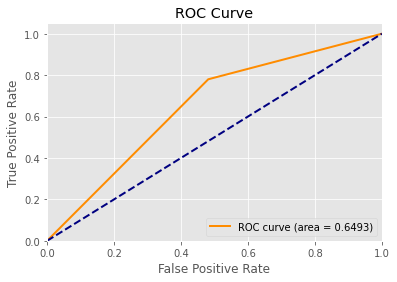

In [119]:
ROC_plot(dt, x_test, y_test)

### 4. Visualization

In [120]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


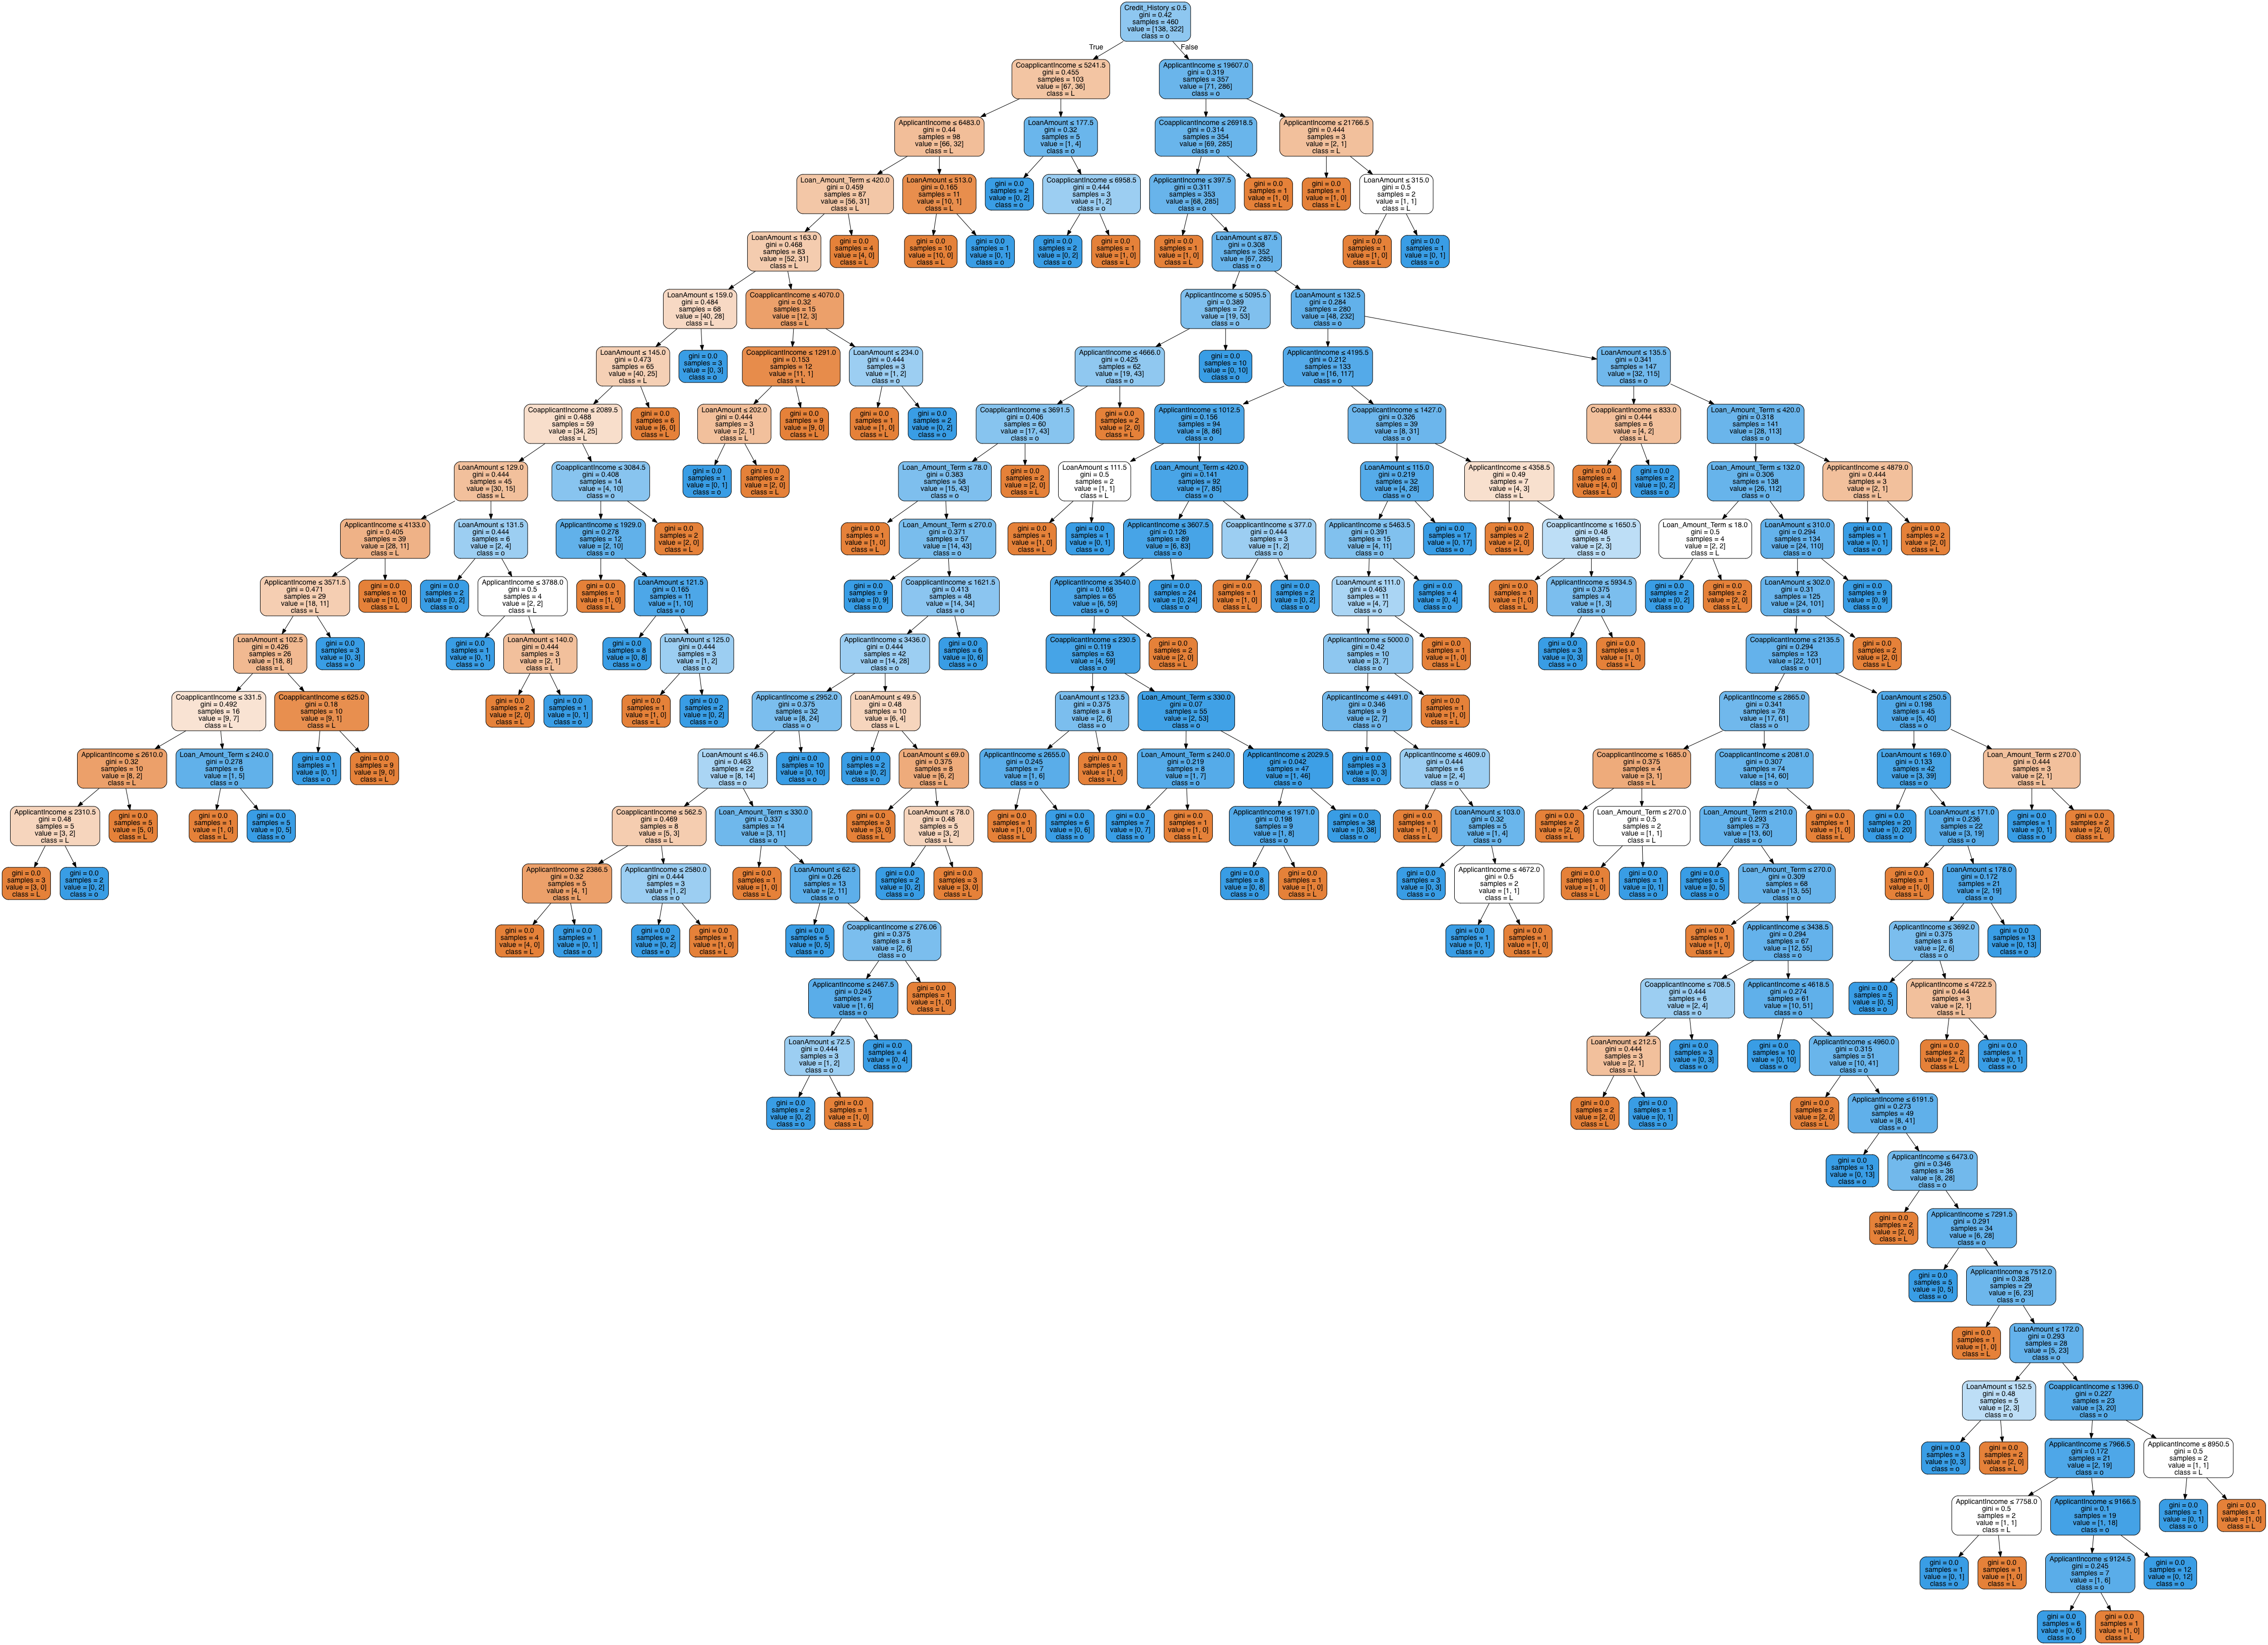

In [121]:
import pydotplus
from sklearn.tree import export_graphviz
train_cols = df.columns[0:len(df.columns)-1]
target_cols = df.columns[-1]
plot_decision_tree(dt, train_cols, target_cols)

### 5. Grid Search

In [159]:
from sklearn.model_selection import GridSearchCV

criterion = ['gini','entropy']
splitter = ['best','random']
max_features = [4, 5, None]
class_weight = ['balanced']
max_depth = [2,100,2]


parameters = dict(criterion=criterion, max_features=max_features, splitter=splitter,class_weight =class_weight,max_depth =max_depth)

ds_grid = GridSearchCV(estimator=dt, param_grid=parameters, n_jobs=-1, scoring='accuracy') 
grid_result = ds_grid.fit(x_train, y_train)
best_params = grid_result.best_estimator_
ts_svm = datetime.datetime.now()
tp_svm = datetime.datetime.now() - ts_svm
print('training time:%s\n' % (tp_svm))
print(grid_result.best_score_)
print(best_params)

training time:0:00:00.000079

0.7652173913043478
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='random')


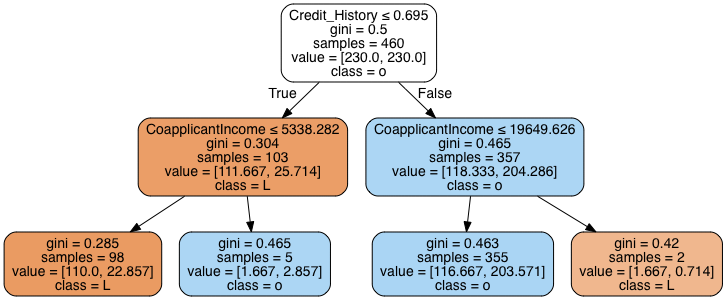

In [156]:
plot_decision_tree(best_params, train_cols, target_cols)

## Example 2

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [3]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
import pydotplus
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")

True

In [5]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
confusion_matrix(y_train, y_train_pred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]])

In [8]:
confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

## 3. Example 3

In [9]:
#Importing libraries

from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [10]:
#Loading IRIS dataset

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df.shape

(150, 4)

In [13]:
#Using decision tree classifier of sklearn

clf = DecisionTreeClassifier()
clf.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

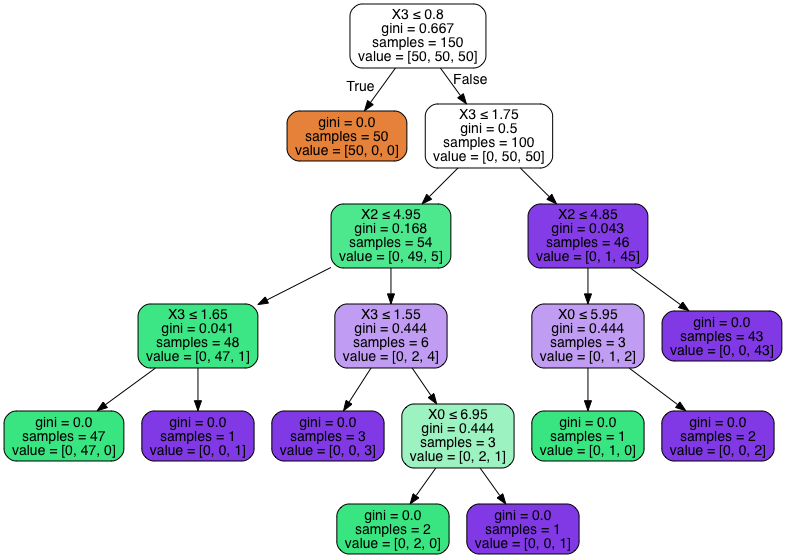

In [14]:
#Printing the decision tree formed using pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

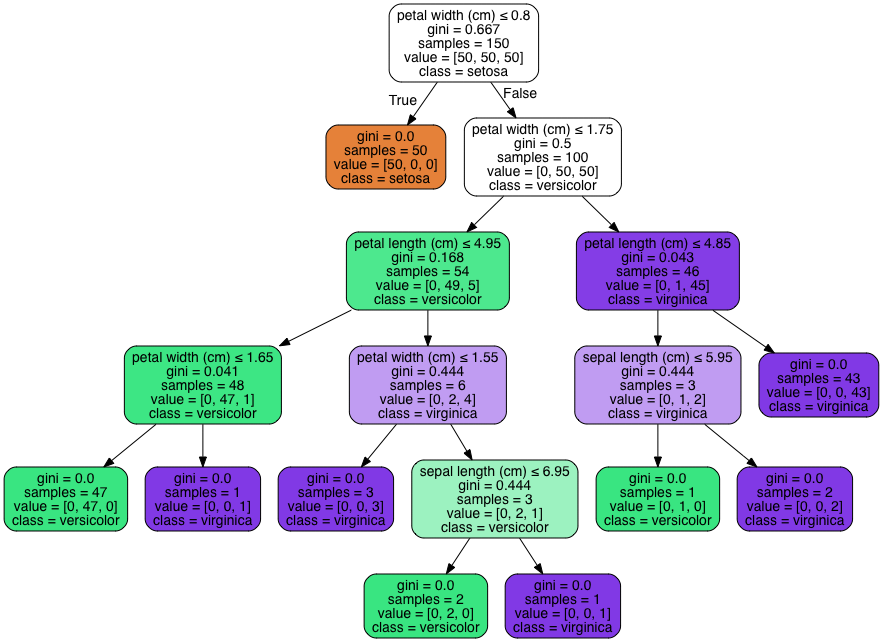

In [15]:
# Printing tree alongwith class names
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = iris.feature_names, class_names = iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())